In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data=pd.read_csv('/content/ec_data.csv')

In [ ]:
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [ ]:
x=data[['temperature','humidity','wind_speed','solar_irradiance']].values
y=data['energy_consumption'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 91027.8984 - mae: 274.1501 - val_loss: 83560.5000 - val_mae: 258.7497
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92287.3047 - mae: 276.2036 - val_loss: 82929.1406 - val_mae: 257.5229
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87455.9922 - mae: 267.6328 - val_loss: 81967.1875 - val_mae: 255.6427
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88279.5781 - mae: 268.3728 - val_loss: 80483.2500 - val_mae: 252.7166
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86296.2266 - mae: 263.5063 - val_loss: 78301.0625 - val_mae: 248.3437
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84304.6875 - mae: 260.5740 - val_loss: 75241.0625 - val_mae: 242.0718
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79507.5859 - mae: 252.1815 - val_loss: 71204.3594 - val_mae: 233.5276
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74520.5078 - mae: 240.9771 - val_loss: 66143.

In [ ]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17861.1250 - mae: 115.1929  
Test Mean Absolute Error: 115.71


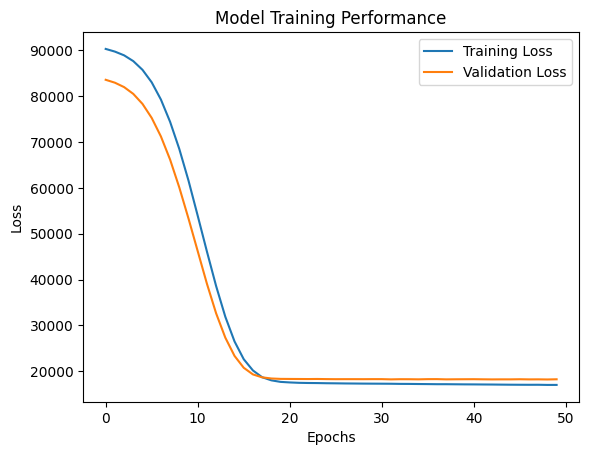

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[290.8449 ],
       [253.3284 ],
       [260.9461 ],
       [208.74692],
       [325.32947],
       [310.94662],
       [317.5063 ],
       [292.9149 ],
       [289.04358],
       [284.44113],
       [244.14586],
       [264.91702],
       [284.1256 ],
       [239.45598],
       [289.4854 ],
       [316.96375],
       [257.32397],
       [324.98734],
       [306.79648],
       [241.60075],
       [275.84808],
       [284.45023],
       [272.15338],
       [282.22662],
       [251.46648],
       [243.3651 ],
       [261.40448],
       [311.1106 ],
       [316.16443],
       [269.36768],
       [235.5453 ],
       [322.3407 ],
       [292.6424 ],
       [266.4505 ],
       [311.06213],
       [294.03748],
       [216.58565],
       [255.62889],
       [278.05045],
       [245.1254 ],
       [248.24586],
       [237.39693],
       [248.11078],
       [263.63446],
       [264.7138 ],
       [254.19728],
       [268.4529 ],
       [262.52985],
       [290.98483],
       [302.38696],


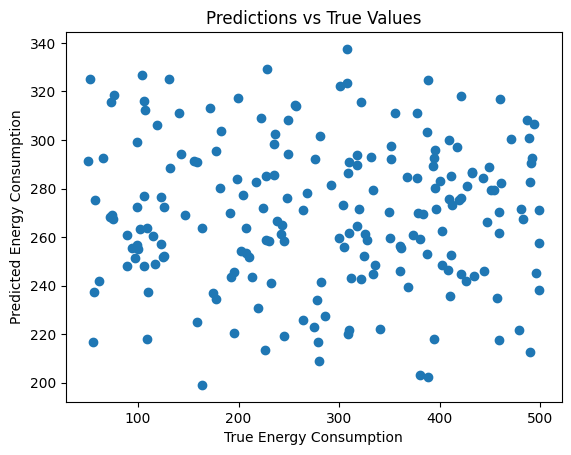

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [ ]:
model1 = Sequential([
    Dense(30, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer with 64 neurons
    Dense(15, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [ ]:
history=model1.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 86985.5938 - mae: 265.2903 - val_loss: 83468.8516 - val_mae: 258.5395
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91397.7188 - mae: 274.1292 - val_loss: 83077.3281 - val_mae: 257.7694
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87398.4688 - mae: 265.7610 - val_loss: 82572.0547 - val_mae: 256.7726
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90871.9922 - mae: 272.4164 - val_loss: 81882.7109 - val_mae: 255.4063
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86998.4219 - mae: 263.6196 - val_loss: 80960.9766 - val_mae: 253.5657
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86051.4766 - mae: 262.8500 - val_loss: 79748.0781 - val_mae: 251.1220
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86546.8125 - mae: 264.8520 - val_loss: 78240.3984 - val_mae: 248.0491
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85641.3906 - mae: 262.0170 - val_loss: 76364.

In [ ]:
test_loss, test_mae = model1.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17981.7051 - mae: 114.6575  
Test Mean Absolute Error: 115.26


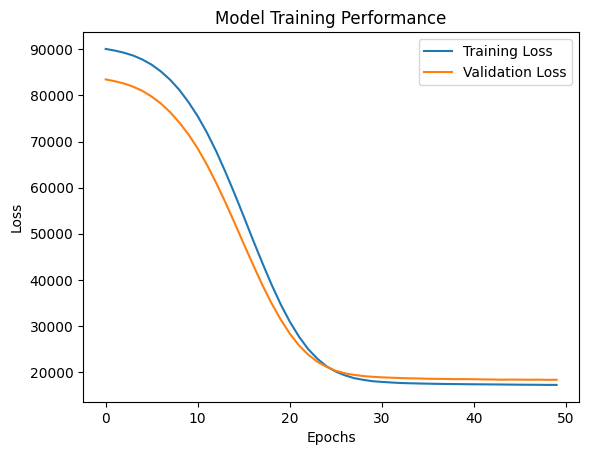

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model1.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[296.41342],
       [260.79132],
       [232.35686],
       [205.6653 ],
       [310.80026],
       [332.75473],
       [286.81125],
       [304.23398],
       [285.251  ],
       [278.94464],
       [250.4482 ],
       [273.12662],
       [270.01154],
       [228.19548],
       [322.17365],
       [305.9608 ],
       [260.37177],
       [313.14957],
       [305.6132 ],
       [264.3995 ],
       [266.10596],
       [282.13065],
       [283.45963],
       [274.03024],
       [256.07773],
       [234.68675],
       [247.48378],
       [316.6381 ],
       [308.06418],
       [275.5696 ],
       [228.34644],
       [324.91772],
       [297.62204],
       [280.59445],
       [314.84592],
       [298.28183],
       [216.77007],
       [259.36258],
       [282.89267],
       [216.0579 ],
       [253.85457],
       [253.07693],
       [246.23727],
       [265.2545 ],
       [261.13824],
       [259.81625],
       [233.51898],
       [273.48618],
       [282.73184],
       [273.6836 ],


In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purvatagde","key":"2e43560017cb8b46912c4c5692757d1a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset?resource=download

Invalid dataset specification https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset?resource=download
